# NB - Binary

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('/content/diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

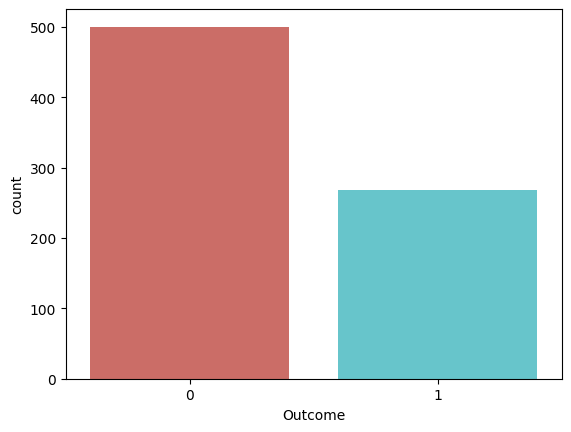

<Figure size 640x480 with 0 Axes>

In [8]:
# class distribution 
data['Outcome'].value_counts()
sns.countplot(x='Outcome', data=data, palette='hls')
plt.show()
plt.savefig('Outcome')

In [25]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [24]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

In [27]:
X_test[0:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199,76,43,0,42.9,1.394,22
122,2,107,74,30,100,33.6,0.404,23
113,4,76,62,0,0,34.0,0.391,25
14,5,166,72,19,175,25.8,0.587,51
529,0,111,65,0,0,24.6,0.660,31


In [28]:
y_test.head()

661    1
122    0
113    0
14     1
529    0
Name: Outcome, dtype: int64

**NB**

In [29]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_p = mnb.predict(X_test)
acc = accuracy_score(y_test, y_p)*100
print("NB - Accuracy: {:.3f}.".format(acc))
print("\nClassification Report")
print(classification_report(y_test, y_p))

NB - Accuracy: 63.636.

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       107
           1       0.42      0.47      0.44        47

    accuracy                           0.64       154
   macro avg       0.58      0.59      0.59       154
weighted avg       0.65      0.64      0.64       154



**Class balancing**

Counter({1: 500, 0: 500})


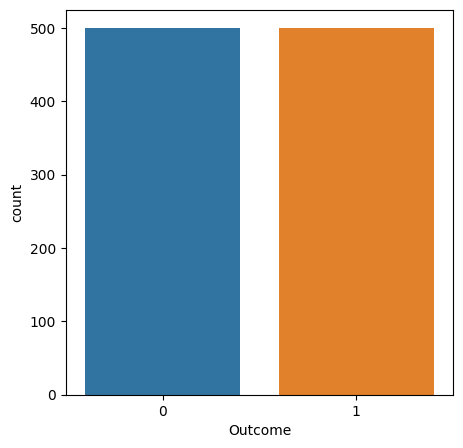

In [16]:
from collections import Counter
from imblearn.over_sampling import SMOTE
X_b, y_b = SMOTE().fit_resample(X, y)

plt.subplots(figsize=(5,5))
sns.countplot(x=y_b)
print(Counter(y_b))

In [17]:
# Split the dataset into a test and training set
X_tr, X_te, y_tr, y_te = train_test_split(X_b, y_b, test_size=0.2, random_state=0)

In [31]:
mnb_b = MultinomialNB()
mnb_b.fit(X_tr, y_tr)
y_p_b = mnb_b.predict(X_te)
acc_1 = accuracy_score(y_te, y_p_b)*100
print("NB - Accuracy: {:.3f}.".format(acc_1))
print("\nClassification Report")
print(classification_report(y_te, y_p_b))

NB - Accuracy: 61.000.

Classification Report
              precision    recall  f1-score   support

           0       0.62      0.66      0.64       105
           1       0.60      0.56      0.58        95

    accuracy                           0.61       200
   macro avg       0.61      0.61      0.61       200
weighted avg       0.61      0.61      0.61       200

